## Precición de calvicie 

El IA Project 2 consiste en realizar desplegar un modelo en streamlit. Nuestro equipo a elegido el dataset [Hair Health Prediction](https://www.kaggle.com/datasets/amitvkulkarni/hair-health) para predecir si se te está cayendo el pelo

## Imports y acercamiento al dataset

In [1]:
# Load dependencies for loading data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import dependencies for pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data/Predict Hair Fall.csv')

### Factors Contributing to Baldness

1. **Genetics**:  
   Indicates whether the individual has a family history of baldness (Yes/No).

2. **Hormonal Changes**:  
   Indicates whether the individual has experienced hormonal changes (Yes/No).

3. **Medical Conditions**:  
   Lists specific medical conditions that may contribute to baldness, such as:
   - Alopecia Areata  
   - Thyroid Problems  
   - Scalp Infection  
   - Psoriasis  
   - Dermatitis  

4. **Medications & Treatments**:  
   Lists medications and treatments that may lead to hair loss, including:
   - Chemotherapy  
   - Heart Medication  
   - Antidepressants  
   - Steroids  

5. **Nutritional Deficiencies**:  
   Lists nutritional deficiencies that may contribute to hair loss, such as:
   - Iron deficiency  
   - Vitamin D deficiency  
   - Biotin deficiency  
   - Omega-3 fatty acid deficiency  

6. **Stress**:  
   Indicates the stress level of the individual (Low/Moderate/High).

7. **Age**:  
   Represents the age of the individual.

8. **Poor Hair Care Habits**:  
   Indicates whether the individual practices poor hair care habits (Yes/No).

9. **Environmental Factors**:  
   Indicates whether the individual is exposed to environmental factors that may contribute to hair loss (Yes/No).

10. **Smoking**:  
    Indicates whether the individual smokes (Yes/No).

11. **Weight Loss**:  
    Indicates whether the individual has experienced significant weight loss (Yes/No).

12. **Baldness (Target)**:  
    Binary variable indicating the presence (1) or absence (0) of baldness in the individual.


In [3]:
data.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [5]:
data

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,1
995,164777,Yes,Yes,No Data,Accutane,Protein deficiency,Low,47,No,No,No,Yes,0
996,143273,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,1
997,169123,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,1


## Análisis de variables

### Variables categóricas

In [6]:
categorical_columns = data.select_dtypes(include='object').columns
categorical_columns

Index(['Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss '],
      dtype='object')

<Axes: xlabel='count', ylabel='Genetics'>

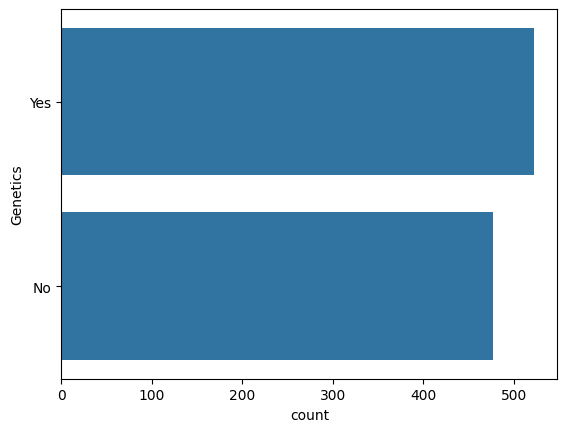

In [7]:
sns.countplot(data['Genetics'])

<Axes: xlabel='count', ylabel='Hormonal Changes'>

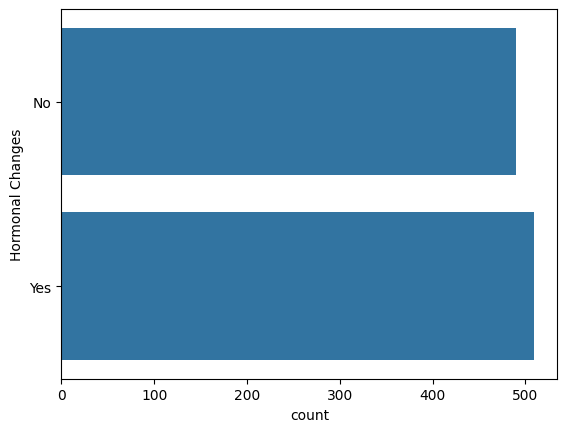

In [8]:
sns.countplot(data['Hormonal Changes'])

<Axes: xlabel='count', ylabel='Medical Conditions'>

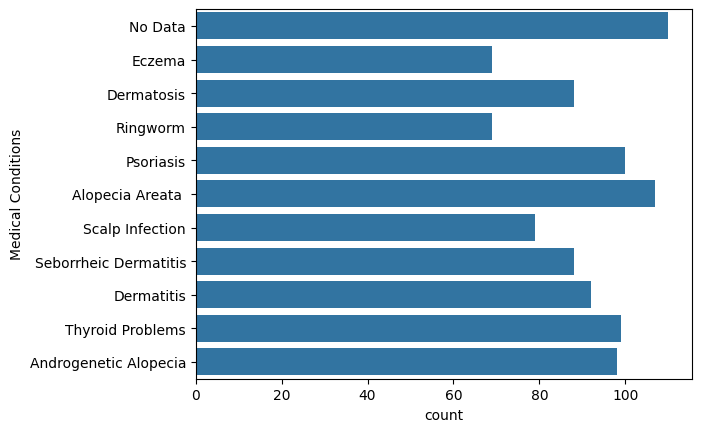

In [9]:
sns.countplot(data["Medical Conditions"])

In [10]:
data.loc[data["Medical Conditions"] == "No Data", "Medical Conditions"] = "No CondMedicas"

<Axes: xlabel='count', ylabel='Medications & Treatments'>

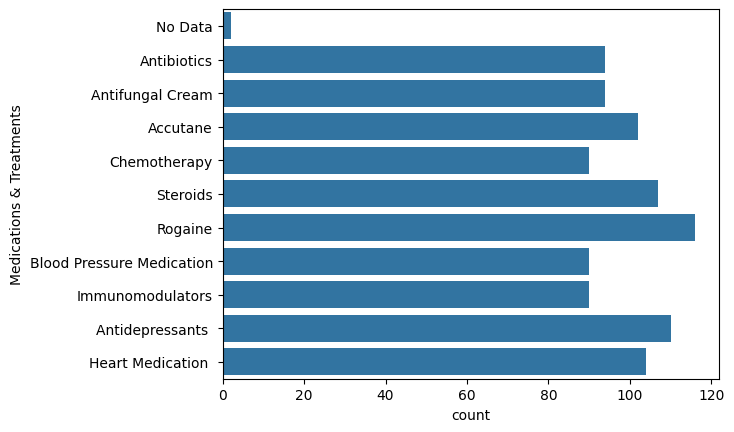

In [11]:
sns.countplot(data["Medications & Treatments"])

In [12]:
data.loc[data["Medications & Treatments"] == "No Data", "Medications & Treatments"] = "No Medications"

<Axes: xlabel='count', ylabel='Nutritional Deficiencies '>

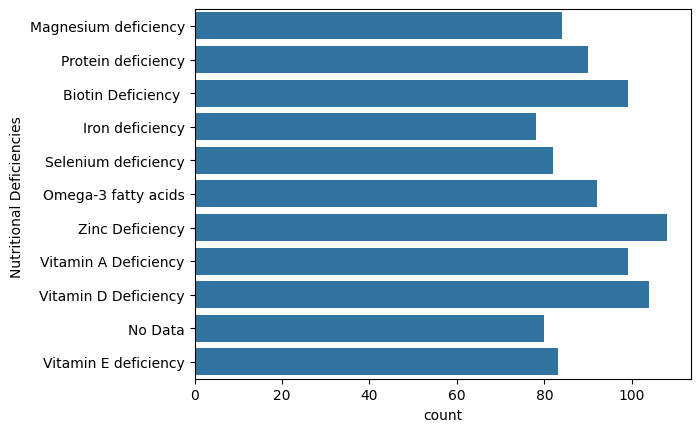

In [13]:
sns.countplot(data["Nutritional Deficiencies "])


In [14]:
data.loc[data["Nutritional Deficiencies "] == "No Data", "Nutritional Deficiencies "] = "No Deficiencies"

<Axes: xlabel='count', ylabel='Stress'>

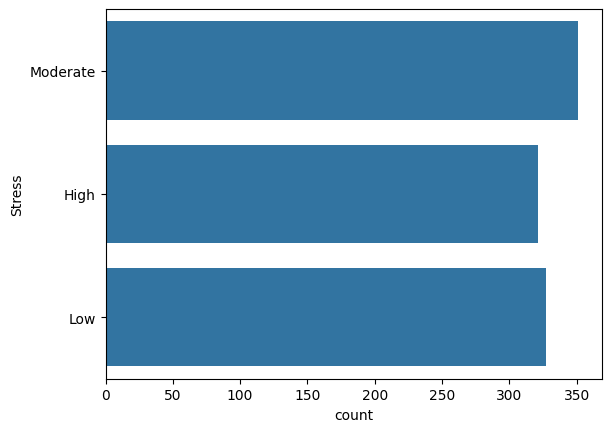

In [15]:
sns.countplot(data["Stress"])

<Axes: xlabel='count', ylabel='Poor Hair Care Habits '>

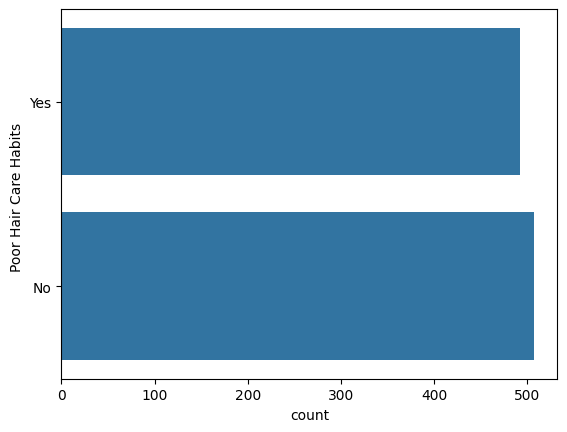

In [16]:
sns.countplot(data["Poor Hair Care Habits "])

In [17]:
categorical_columns

Index(['Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss '],
      dtype='object')

<Axes: xlabel='count', ylabel='Environmental Factors'>

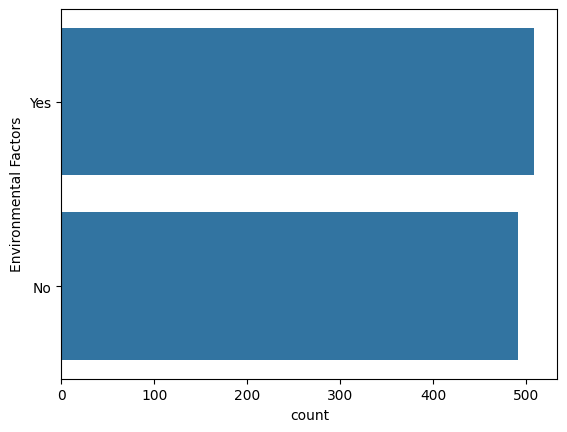

In [18]:
sns.countplot(data["Environmental Factors"])

<Axes: xlabel='count', ylabel='Smoking'>

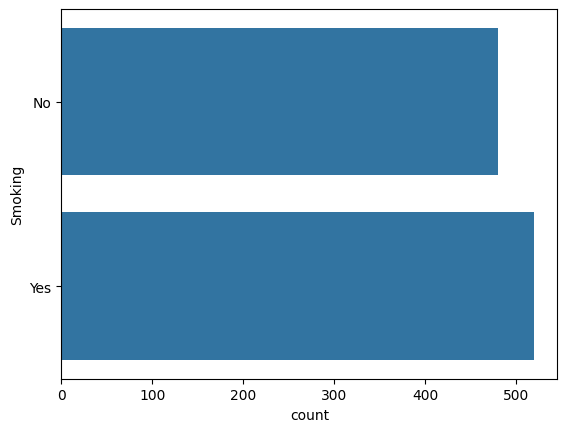

In [19]:
sns.countplot(data["Smoking"])

<Axes: xlabel='count', ylabel='Weight Loss '>

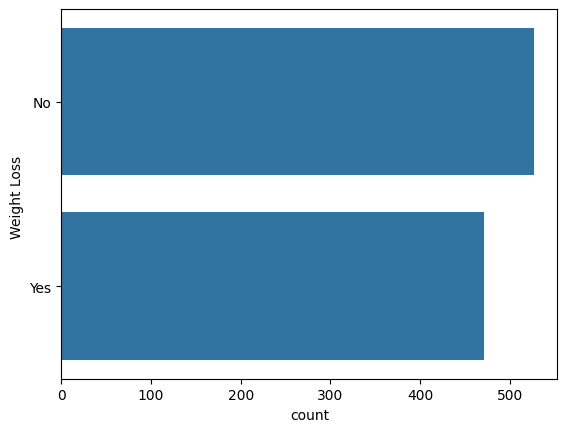

In [20]:
sns.countplot(data["Weight Loss "])


<Axes: ylabel='Age'>

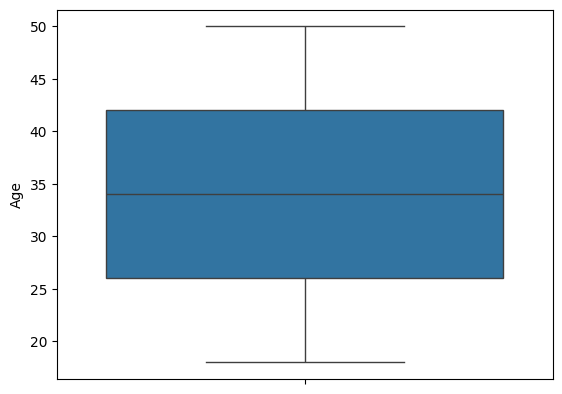

In [21]:
sns.boxplot(data['Age'])

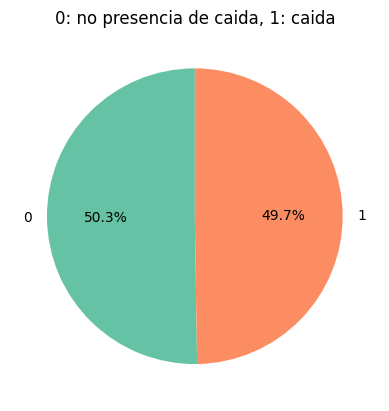

Hair Loss
0    502
1    497
Name: count, dtype: int64


In [22]:
label_counts = data["Hair Loss"].value_counts()

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(label_counts)))
plt.title('0: no presencia de caida, 1: caida')

# Mostrar el gráfico
plt.show()

# Mostrar los conteos de cada etiqueta
print(label_counts)

## Preprocessing Data

Vamos a entrenar una red neuronal. Por tanto, vamos a tratar los datos para ello. No hará falta una ingeniería de características porque es la propia red la que se encarga de ello. 

Las transformcaiones a hacer son las siguientes: 
- Genetics, hormonal changes, Poor Hair Care Habits, Environmental Factors, Smoking, Weight Loss: y/n to 0/1

- Medical Conditions, Medications & Treatments, Nutritional Deficiencies: one hot encoding 

- Stress: moderate, high, low -> 0,1,2

In [23]:
map_yes_no = {
    "Yes": 1,
    "No": 0
}

In [24]:
data.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss'],
      dtype='object')

In [25]:
colums_yes_no = ["Genetics" ,"Hormonal Changes", "Poor Hair Care Habits ", "Environmental Factors", "Smoking", "Weight Loss "]

In [26]:
columns_onehotencoder = ["Medical Conditions", "Medications & Treatments", "Nutritional Deficiencies "]

In [27]:
# Iterar por las columnas y mapear los valores
for col in colums_yes_no:
    if col in data.columns:  # Verifica que la columna exista
        data[col] = data[col].map(map_yes_no)
    else:
        print(f"Columna {col} no encontrada en el dataframe.")

In [28]:
data

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,1,0,No CondMedicas,No Medications,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,1,0,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,1,1,1,1,1
995,164777,1,1,No CondMedicas,Accutane,Protein deficiency,Low,47,0,0,0,1,0
996,143273,0,1,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,1,0,1,1,1
997,169123,0,1,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,1,1,1,1,1


In [29]:
# Instanciar el codificador
encoder = OneHotEncoder()  # sparse=False para obtener una matriz densa
for col in columns_onehotencoder:
    
    # Ajustar y transformar la columna 'col'
    encoded = encoder.fit_transform(data[[col]]).toarray()
    # Convertir el resultado en un DataFrame
    encoded_df = pd.DataFrame(encoded, columns=encoder.categories_[0])

    # Concatenar el DataFrame original con las columnas codificadas
    data = pd.concat([data, encoded_df], axis=1)
    
    data.drop(col, axis=1, inplace=True)

print(data)


         Id  Genetics  Hormonal Changes    Stress  Age  \
0    133992         1                 0  Moderate   19   
1    148393         0                 0      High   43   
2    155074         0                 0  Moderate   26   
3    118261         1                 1  Moderate   46   
4    111915         0                 0  Moderate   30   
..      ...       ...               ...       ...  ...   
994  184367         1                 0       Low   33   
995  164777         1                 1       Low   47   
996  143273         0                 1  Moderate   20   
997  169123         0                 1  Moderate   32   
998  127183         1                 1       Low   34   

     Poor Hair Care Habits   Environmental Factors  Smoking  Weight Loss   \
0                         1                      1        0             0   
1                         1                      1        0             0   
2                         1                      1        0             

In [30]:
data

,Id,Genetics,Hormonal Changes,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss,...,Iron deficiency,Magnesium deficiency,No Deficiencies,Omega-3 fatty acids,Protein deficiency,Selenium deficiency,Vitamin A Deficiency,Vitamin D Deficiency,Vitamin E deficiency,Zinc Deficiency
0,133992,1,0,Moderate,19,1,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,148393,0,0,High,43,1,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,155074,0,0,Moderate,26,1,1,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,118261,1,1,Moderate,46,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,111915,0,0,Moderate,30,0,1,1,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,1,0,Low,33,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
995,164777,1,1,Low,47,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
996,143273,0,1,Moderate,20,1,0,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
997,169123,0,1,Moderate,32,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
map_stres = {
    "Low": 0,
    "Moderate": 1,
    "High": 2
}
data["Stress"] = data["Stress"].map(map_stres)

In [32]:
data

,Id,Genetics,Hormonal Changes,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss,...,Iron deficiency,Magnesium deficiency,No Deficiencies,Omega-3 fatty acids,Protein deficiency,Selenium deficiency,Vitamin A Deficiency,Vitamin D Deficiency,Vitamin E deficiency,Zinc Deficiency
0,133992,1,0,1,19,1,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,148393,0,0,2,43,1,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,155074,0,0,1,26,1,1,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,118261,1,1,1,46,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,111915,0,0,1,30,0,1,1,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,1,0,0,33,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
995,164777,1,1,0,47,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
996,143273,0,1,1,20,1,0,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
997,169123,0,1,1,32,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### normalización y transformación a numpy

In [323]:
# Separate input variables from output label
X = data.drop("Hair Loss", axis=1)
y = data["Hair Loss"]

In [324]:
# Normalizing the data to improve stability while training
sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

In [325]:
print(type(X_norm))  
print(type(y))  

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [326]:
y = y.values.reshape(-1, 1)

In [327]:
y

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [328]:
print("Shape of training labels: ", y.shape)

Shape of training labels:  (999, 1)


In [329]:
# Convierte las etiquetas de entrenamiento y validación a One-Hot encoding
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y = onehot_enc.fit_transform(y).toarray()

In [330]:
# Show shape of training data and labels
print("Shape of training data: ", X.shape)
print("Shape of training labels: ", y.shape)
# Show different classes to predict
np.unique(y)

Shape of training data:  (999, 42)
Shape of training labels:  (999, 2)


array([0., 1.])

In [399]:
# Split data in training and validation partitions
X_train, X_val, y_train, y_val = train_test_split(X_norm, y,
                                                  test_size=0.2)

In [332]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,
                                                  test_size=0.5)

In [333]:
# Show sizes of partitions
print("Size of training data: ", X_train.shape)
print("Size of training labels: ", y_train.shape)
print("Size of validation data: ", X_val.shape)
print("Size of validation labels: ", y_val.shape)
print("Size of test labels: ", X_test.shape)
print("Size of test labels: ", y_test.shape)

Size of training data:  (799, 42)
Size of training labels:  (799, 2)
Size of validation data:  (100, 42)
Size of validation labels:  (100, 2)
Size of test labels:  (100, 42)
Size of test labels:  (100, 2)


In [334]:
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [335]:
print("Media de X_train_scaled:", np.mean(X_train))
print("Desviación estándar de X_train_scaled:", np.std(X_train))

Media de X_train_scaled: -0.0010006279089684752
Desviación estándar de X_train_scaled: 0.9892187154075243


In [336]:
# Busca NaN o infinitos en los datos originales
print("NaN en X_train:", np.isnan(X_train).sum())
print("Infinitos en X_train:", np.isinf(X_train).sum())

# Verifica si hay columnas con varianza cero (valores constantes)
variances = np.var(X_train, axis=0)
print("Columnas con varianza cero:", np.where(variances == 0)[0])

NaN en X_train: 0
Infinitos en X_train: 0
Columnas con varianza cero: []


In [378]:
class_distribution = np.sum(y_train, axis=0)  # Cuenta [clase 0, clase 1]
print("Distribución de clases:", class_distribution)

Distribución de clases: [412. 387.]


In [379]:
unique_labels = np.unique(y_train.argmax(axis=1), return_counts=True)
print("Etiquetas únicas y conteos:", unique_labels)

Etiquetas únicas y conteos: (array([0, 1]), array([412, 387]))


In [380]:
variances = np.var(X_train, axis=0)
print("Features con varianza cercana a 0:", np.where(variances < 1e-6)[0])

Features con varianza cercana a 0: [28]


## Definir Fully Connected NN

In [337]:
!python3 --version


Python 3.11.11


In [401]:
# Import dependencies for designing Keras model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2


In [402]:
model = Sequential()
model.add(Dense(64, input_dim=42, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(2, activation='softmax'))
model.summary()

/Users/jorgemolto/Documents/PARA/01-Projects/EDEM/MIA/MIA PROJECTS/IA_PROJECT2/tensorflow_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 64)             │         2,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,282 (20.63 KB)

 Trainable params: 5,090 (19.88 KB)

 Non-trainable params: 192 (768.00 B)

In [409]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),  
    # optimizer="adam",  

    metrics=['accuracy']
)

In [410]:
history = model.fit(
    X_train, y_train,
    epochs=25,  # ↑ Épocas (si usas Early Stopping)
    batch_size=32,  # ↓ Batch size para updates más frecuentes
    validation_data=(X_val, y_val),
    shuffle=True  # Asegurar que los datos se barajan
)

Epoch 1/25


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5604 - loss: 0.7519 - val_accuracy: 0.4850 - val_loss: 0.7707
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5254 - loss: 0.7665 - val_accuracy: 0.4850 - val_loss: 0.7688
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5841 - loss: 0.7442 - val_accuracy: 0.5150 - val_loss: 0.7675
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5251 - loss: 0.7529 - val_accuracy: 0.5150 - val_loss: 0.7660
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5668 - loss: 0.7446 - val_accuracy: 0.5100 - val_loss: 0.7649
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5316 - loss: 0.7508 - val_accuracy: 0.4950 - val_loss: 0.7647
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5963 - loss: 0.7434 - val_accuracy: 0.4700 - val_loss: 0.7662
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5913 - loss: 0.7357 - val_accuracy: 0.4700 - val_loss: 0.7655
Epo

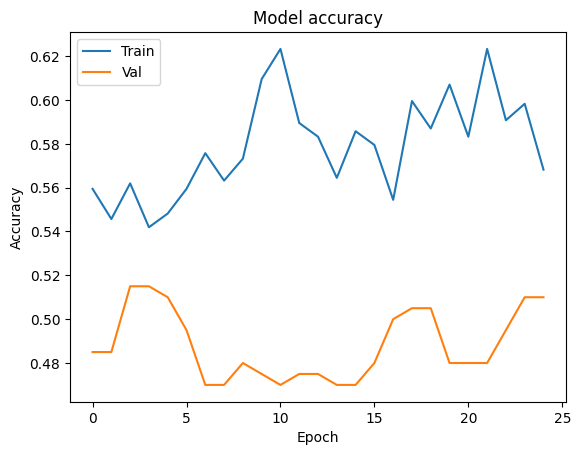

In [411]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()